<div style="float:right; padding-top: 15px; padding-right: 15px">
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="250">
        </a>
    </div>
</div>

# introduction to matplotlib and seaborn

## 0. introduction

* matplotlib is a low level framework for plotting inspired by Matlab plotting capabilities.
* nowadays, there are other libraries more effective to make visualizations, but most of them build on top of matplotlib.

In matplotlib, the figure is composed of the following elements (and also, geometric shapes like rectangles, circles, etc.):

![matplotlib anatomy of a figure](https://matplotlib.org/3.1.1/_images/sphx_glr_anatomy_001.png)

## 1. imports & setup

first, let's import matplotlib and data manipulation libraries...

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

this is a jupyter magic to show inline plots in jupyter...

In [2]:
%matplotlib inline

## 2. pure matplotlib plots

In [3]:
x = np.arange(0,10,1)

In [4]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
y = np.power(x, 2)

In [6]:
y

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

### 2.1 line plot

not very recommended...

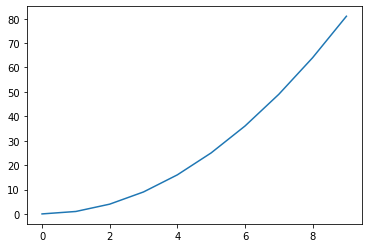

In [7]:
plt.plot(x, y, '-')

### 2.2 scatter plot

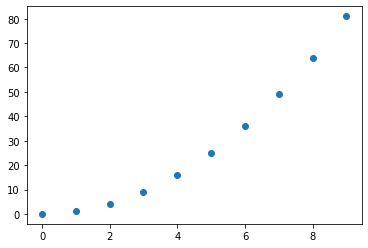

In [8]:
plt.scatter(x, y)

## 3. more matplotlib

first, setup some simple data...

In [9]:
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}

group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

In [10]:
group_data

[109438.5,
 103569.59,
 112214.71,
 112591.43,
 100934.3,
 103660.54,
 137351.96,
 123381.38,
 135841.99,
 104437.6]

In [11]:
group_names

['Barton LLC',
 'Frami, Hills and Schmidt',
 'Fritsch, Russel and Anderson',
 'Jerde-Hilpert',
 'Keeling LLC',
 'Koepp Ltd',
 'Kulas Inc',
 'Trantow-Barrows',
 'White-Trantow',
 'Will LLC']

a good way to plot, is to declare figure and axes together using `plt.subplots`...

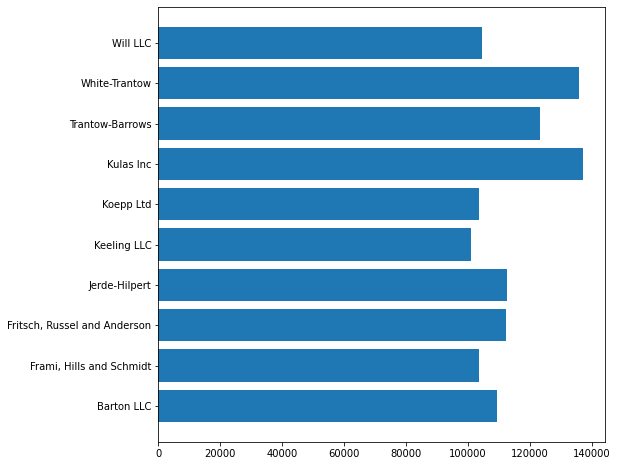

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,8))
ax.barh(group_names, group_data);

let's make something more complex... like a multiple plot...

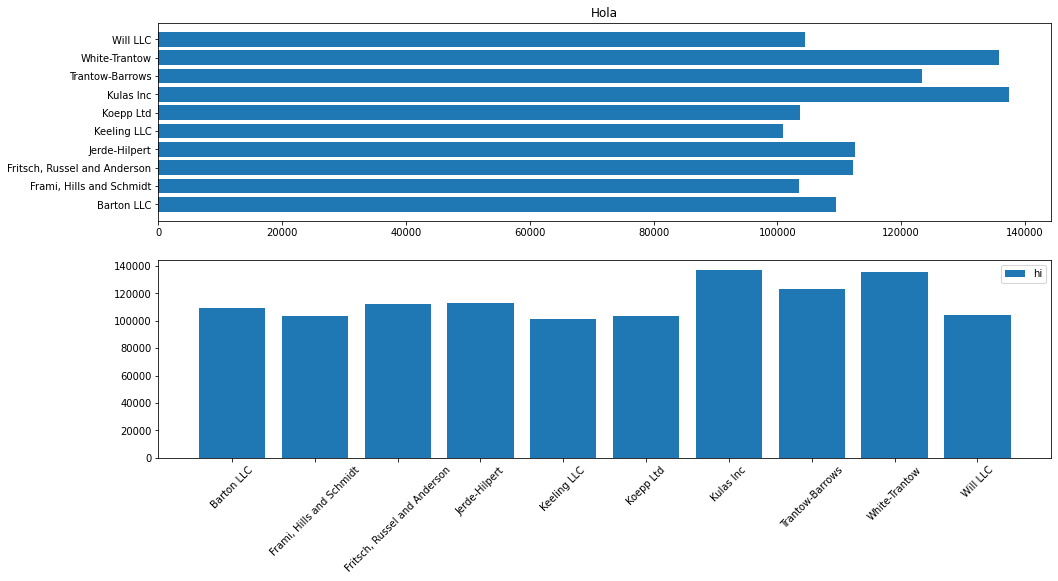

In [13]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(16, 8))
axes[0].set_title('Hola')
axes[0].barh(group_names, group_data)
axes[1].bar(group_names, group_data, label='hi')
axes[1].xaxis.set_tick_params(rotation=45)
axes[1].legend()
plt.show();

as you can see, plot anatomy is complex...

In [14]:
axes[1].get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

now, let's set the style of plots...

In [15]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [16]:
plt.style.use('fivethirtyeight')

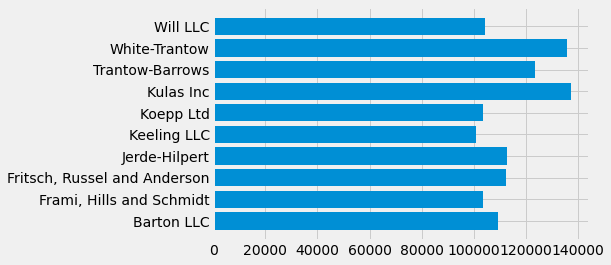

In [17]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data);

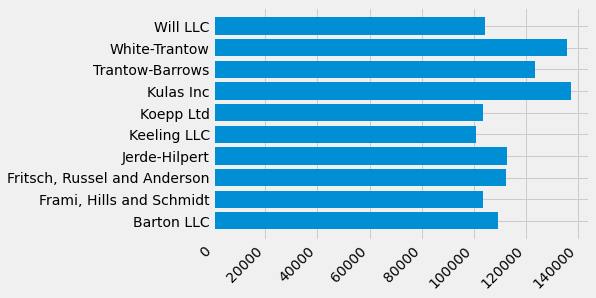

In [18]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right');

let's set some other properties...

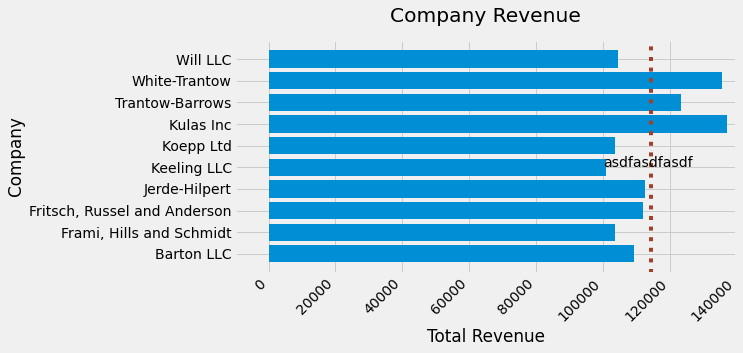

In [19]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], 
       xlabel='Total Revenue', 
       ylabel='Company',
       title='Company Revenue')
ax.axvline(group_mean, ls=':', color='#a2402b')
ax.text(100000, 4, 'asdfasdfasdf')
ax.title.set(y=1.05)
plt.show()

## 4. matplotlib I/O

let's save the image...

In [20]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

In [21]:
fig.savefig('./ironhack_matplotlib_lesson.pdf', 
            transparent=False, 
            dpi=80, 
            bbox_inches="tight")

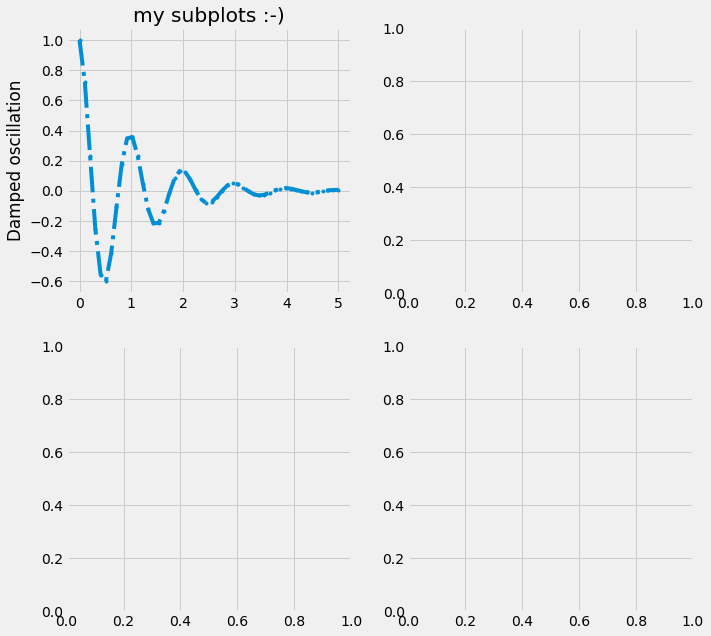

In [22]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

axes[0][0].plot(x1, y1, '.-.')
axes[0][0].set_title('my subplots :-)')
axes[0][0].set_ylabel('Damped oscillation')

plt.show()

## 5. seaborn

In [29]:
# import numpy as np
# import pandas as pd

plt.style.use('default')

import seaborn as sns

In [30]:
sns.set_style('white')

In [31]:
x = np.arange(100)
y = x ** 2

data = pd.DataFrame({'x': x, 'y': y})

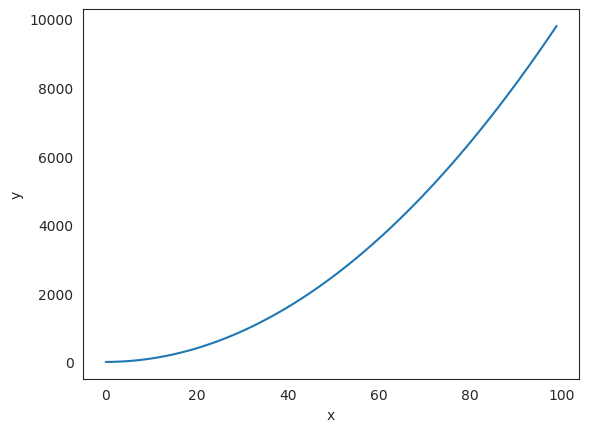

In [32]:
sns.lineplot(data=data, x='x', y='y')

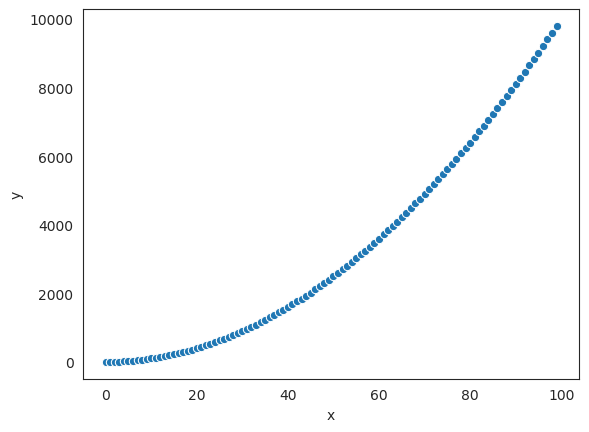

In [33]:
sns.scatterplot(data=data, x='x', y='y')

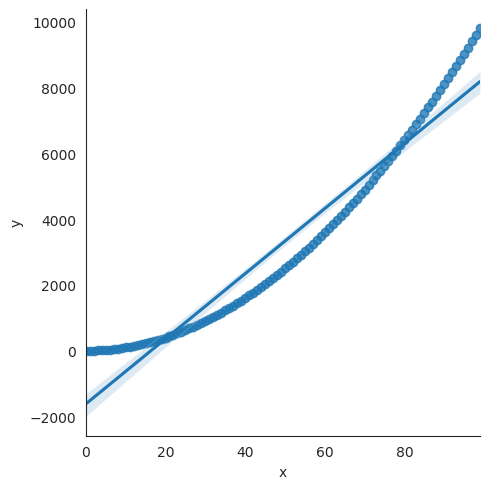

In [34]:
sns.lmplot(data=data, x='x', y='y')

<div style="padding-top: 25px; float: right">
    <div>    
        <i>&nbsp;&nbsp;© Copyright by</i>
    </div>
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="125">
        </a>
    </div>
</div>